<a href="https://colab.research.google.com/github/plotia/Computational-Methods-for-Biological-Modelling-and-Simulation/blob/main/HW5_02_712_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 4 (30 points)**: In class a problem was discussed and results were derived  for the Moran birth-death
model with overlapping generations. Questions were answered such as: what is the probability of fixation
of a new mutant A in the population composed of B individuals, given a fixed population size N
and the assumption that the new mutant does not confer a fitness benefit (neutrality assumption).

a). Simulate the Moran birth-death model, plot some trajectories over time and see whether you
can recapture the result we derived in class. (i.e. : The probability of fixation is 1/N , for a given
N fixed population size.)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random

def moran_neutral(N):
    allele_A = 'A'
    allele_B = 'B'
    fix = 0

    plt.figure(figsize=(10, 6))  # Create a single figure for all simulations

    for _ in range(N):  # simulations
        population = np.full(N, allele_B).tolist() # initially only B in population
        randomly_insert_mutation_A = random.randint(0, N - 1)
        population[randomly_insert_mutation_A] = allele_A # intoduction of mutation
        gen_count = 0
        count_A = population.count(allele_A)
        x_axis = [gen_count]
        y_axis = [count_A]

        while allele_A in population and allele_B in population:  # generations
            birth = np.random.randint(0, N)  # birth
            death = np.random.randint(0, N)  # death
            if population[birth] == 'A' and population[death] == 'B':  # birth of A
                population[death] = allele_A
            elif population[birth] == 'B' and population[death] == 'A':  # birth of B
                population[death] = allele_B

            gen_count += 1
            y_axis.append(population.count(allele_A))
            x_axis.append(gen_count)

        plt.plot(x_axis, y_axis, label=f"sim {_ + 1}", alpha=0.7)  # Plot each simulation

        if allele_B not in population:
            fix += 1

    # Customize the plot
    plt.xlabel('Generation')
    plt.ylabel('Allele A Count')
    plt.title(f'Moran Birth - Death Simulation under neutral conditions for {N} simulations')
    #plt.legend(title="Simulations", loc="upper right", fontsize="small", ncol=2)
    plt.grid(alpha=0.3)
    plt.show()

    return print(f'The probability of fixation for N = {N} is 1/{N/fix}')

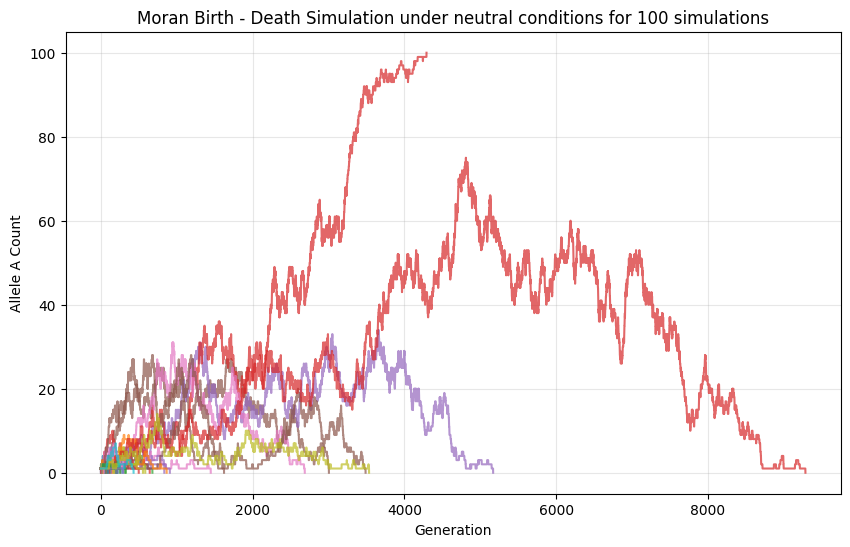

The probability of fixation for N = 100 is 1/100.0


In [50]:
moran_neutral(100)

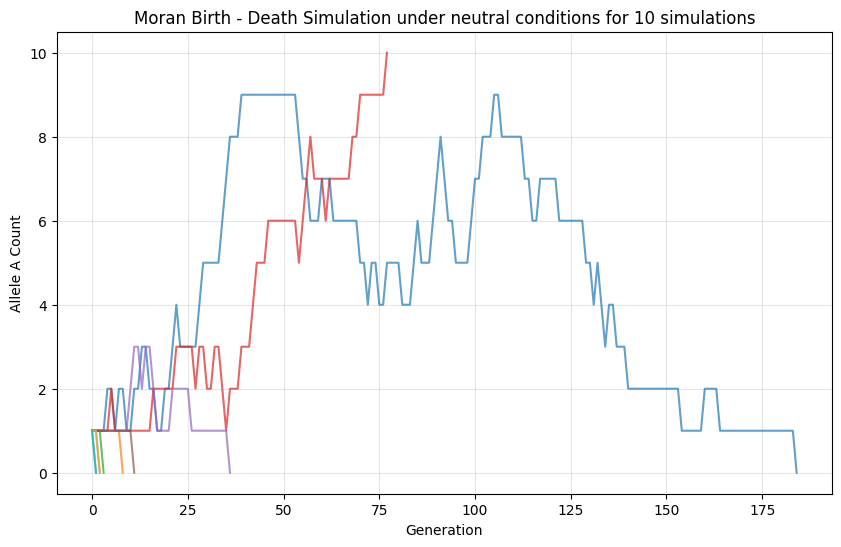

The probability of fixation for N = 10 is 1/10.0


In [58]:
moran_neutral(10)

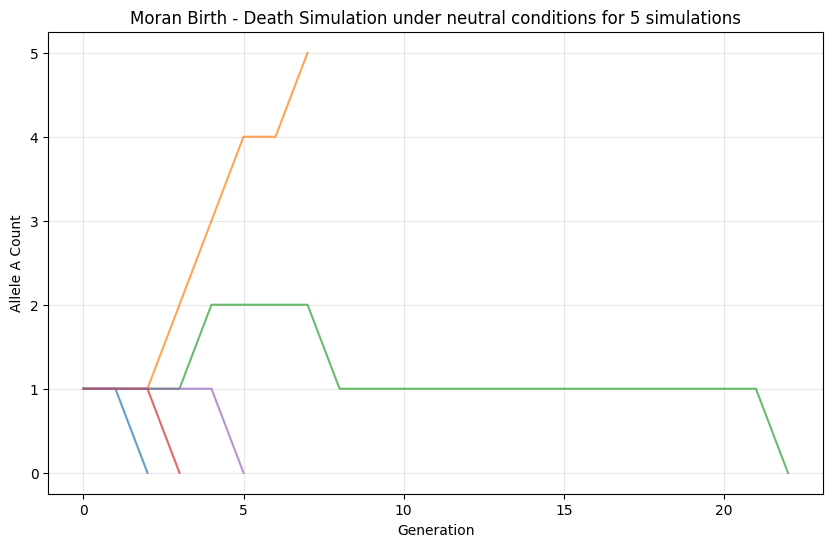

The probability of fixation for N = 5 is 1/5.0


In [59]:
moran_neutral(5)

b). If we now assume a selective benefit of s for allele A (such that B individuals have probability 1 to give birth and A individuals have probability (1+s)) discuss (using simulations) how this changes the probability of fixation for A.

In [86]:
def moran_bias(N,s):
    allele_A = 'A'
    allele_B = 'B'
    fix = 0

    plt.figure(figsize=(10, 6))  # Create a single figure for all simulations

    for _ in range(N):  # simulations
        population = np.full(N, allele_B).tolist() # initially only B in population
        randomly_insert_mutation_A = random.randint(0, N - 1)
        population[randomly_insert_mutation_A] = allele_A # intoduction of mutation
        raw_probabilities = np.ones(N)
        raw_probabilities[randomly_insert_mutation_A] = 1 + s
        total_probability = np.sum(raw_probabilities)
        normalized_probabilities = [p / total_probability for p in raw_probabilities]
        gen_count = 0
        count_A = population.count(allele_A)
        x_axis = [gen_count]
        y_axis = [count_A]
        indices = np.linspace(0,N-1,N)

        while allele_A in population and allele_B in population:  # generations
            random_biased_birth = random.choices(indices, weights=normalized_probabilities, k=1)
            birth = round(random_biased_birth[0]) # birth
            death = np.random.randint(0, N)  # death
            if population[birth] == 'A' and population[death] == 'B':  # birth of A
                population[death] = allele_A
            elif population[birth] == 'B' and population[death] == 'A':  # birth of B
                population[death] = allele_B

            gen_count += 1
            y_axis.append(population.count(allele_A))
            x_axis.append(gen_count)

        plt.plot(x_axis, y_axis, label=f"sim {_ + 1}", alpha=0.7)  # Plot each simulation

        if allele_B not in population:
            fix += 1

    # Customize the plot
    plt.xlabel('Generation')
    plt.ylabel('Allele A Count')
    plt.title(f'Moran Birth - Death Simulation under biased conditions where s = {s} for {N} simulations')
    #plt.legend(title="Simulations", loc="upper right", fontsize="small", ncol=2)
    plt.grid(alpha=0.3)
    plt.show()

    return print(f'The probability of fixation for N = {N} is 1/{N/fix}')

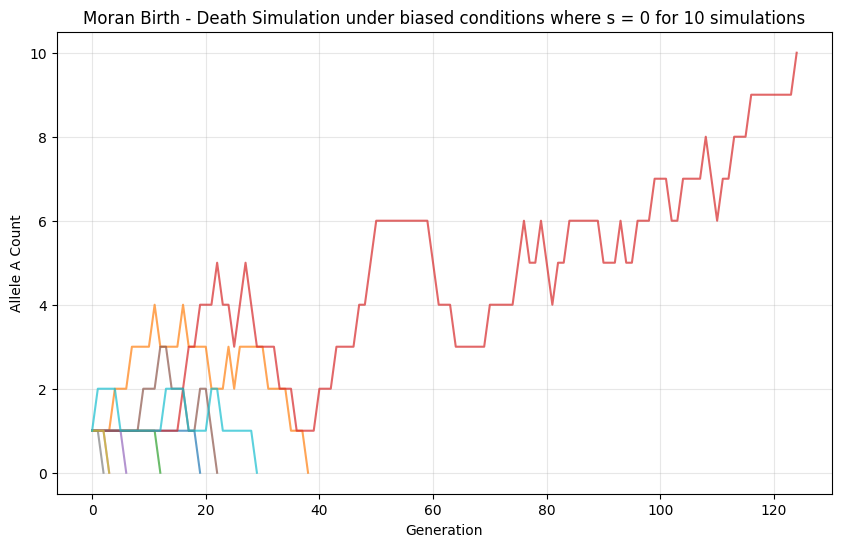

The probability of fixation for N = 10 is 1/10.0


In [90]:
moran_bias(10,0)

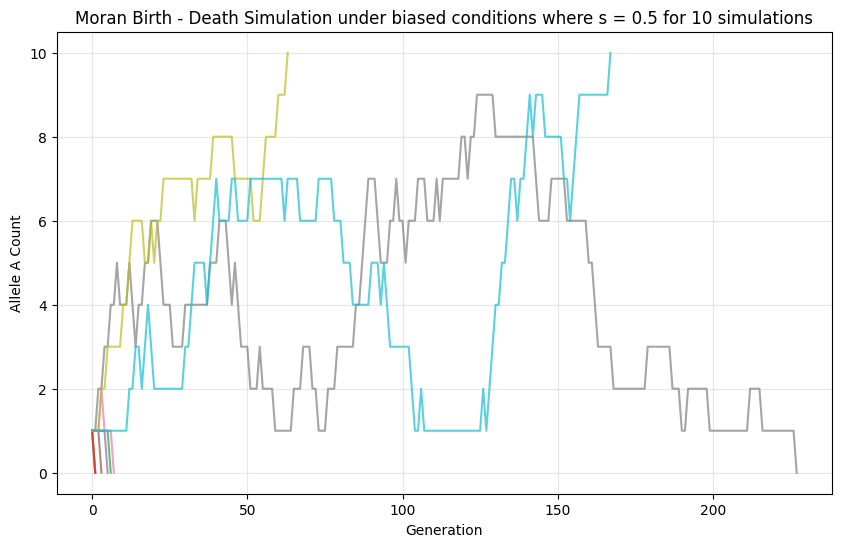

The probability of fixation for N = 10 is 1/5.0


In [97]:
moran_bias(10,0.5)

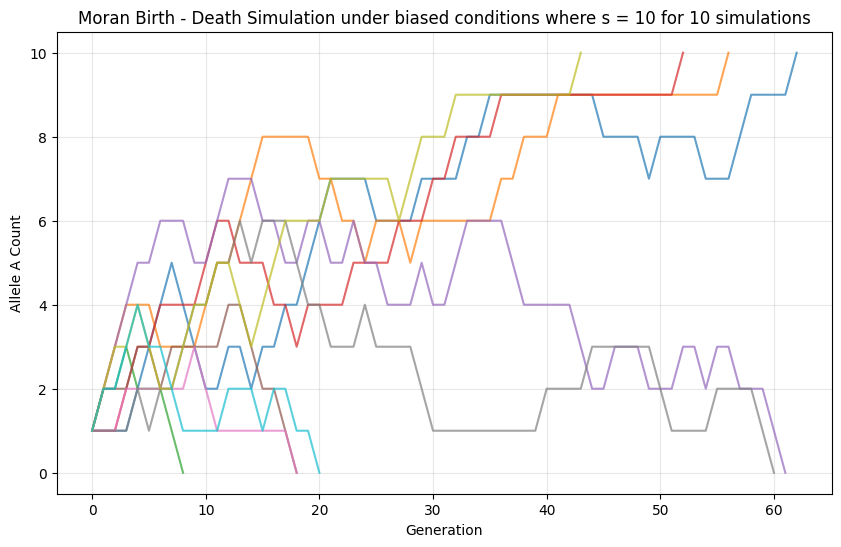

The probability of fixation for N = 10 is 1/2.5


In [99]:
moran_bias(10,10)

As seen above, the probability of fixation over allele A increases by increasing the s. Hence, probability of fixation over a with s > 0 is greater than 1/N